In [2]:
#Importing the necessary libraries
import pandas as pd
import nltk
import re
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading the dataset
tweets_df = pd.read_csv('Training Tweets.csv',encoding = 'latin1')
tweets_df.tail(10)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1599989,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599990,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599991,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599992,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599993,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha..."
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [4]:
tweets_df.shape

(1599999, 6)

In [5]:
tweets_df.isnull().sum()

0                                                                                                                      0
1467810369                                                                                                             0
Mon Apr 06 22:19:45 PDT 2009                                                                                           0
NO_QUERY                                                                                                               0
_TheSpecialOne_                                                                                                        0
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
dtype: int64

In [6]:
tweets_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [7]:
tweets_df.describe()

,0,1467810369
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


<AxesSubplot:>

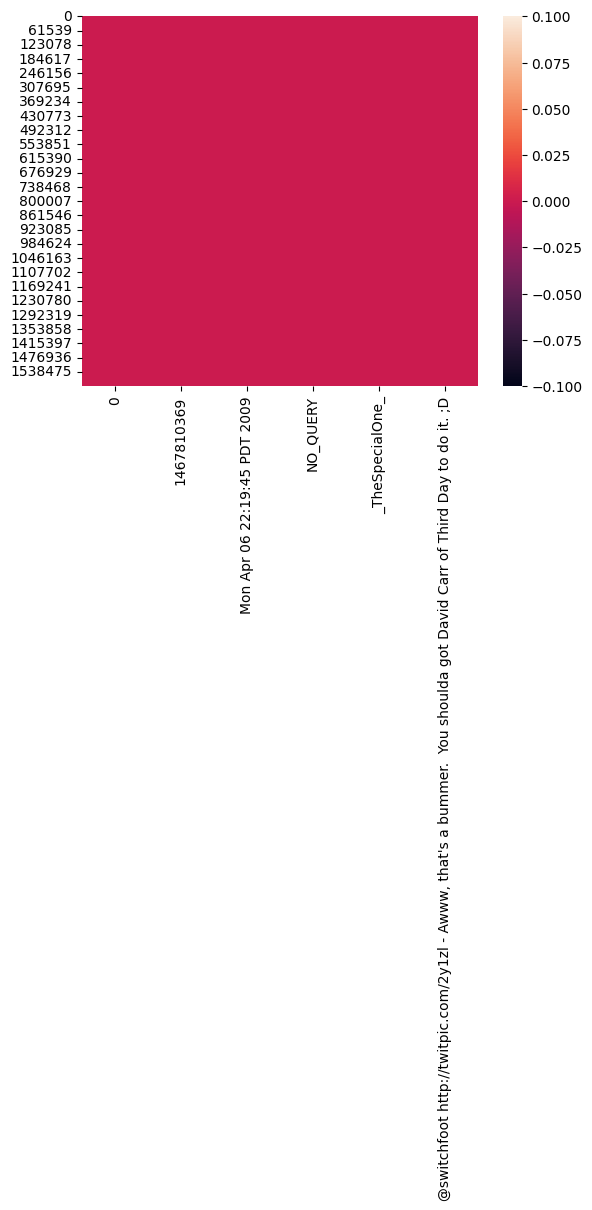

In [8]:
#checks for null elements
sns.heatmap(tweets_df.isnull())

In [9]:
tweets_df.shape

(1599999, 6)

In [10]:
tweets_df = tweets_df.rename(columns={'old_col1': 'new_col1', 'old_col2': 'new_col2'})

In [11]:
column_index_to_rename = 1
new_column_name = 'ids'

column_names = tweets_df.columns.tolist()
column_names[column_index_to_rename] = new_column_name
tweets_df.columns = column_names
tweets_df = tweets_df.rename(columns={"0": "target", "1467810369": "ids","Mon Apr 06 22:19:45 PDT 2009":"date","NO_QUERY":"flag","_TheSpecialOne_":"user"})
tweets_df.head(5)
column_index_to_rename = 5
new_column_name = 'text'

column_names = tweets_df.columns.tolist()
column_names[column_index_to_rename] = new_column_name
tweets_df.columns = column_names
tweets_df.head(10)

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [12]:
# A classifcation column based on the target value
sentiments =  tweets_df['target']
classification_list = []
for sentiment  in sentiments:
    if sentiment == 0:
        classification_list.append('negative')
    elif sentiment == 2:
        classification_list.append('neutral')
    else:
        classification_list.append('positive')

# Creating a sentiment column from the classification_list
tweets_df['Sentiment'] = classification_list

# Check the random 5
tweets_df.sample(5)

,target,ids,date,flag,user,text,Sentiment
15669,0,1554454525,Sat Apr 18 17:02:25 PDT 2009,NO_QUERY,xstarlight,shushhh girl...shut your lips...reaaaallly mis...,negative
258287,0,1985154727,Sun May 31 16:32:32 PDT 2009,NO_QUERY,Meghan_H,@Moondoll16 THERE'S NO WORDS!?I PUT WORDS ON T...,negative
486296,0,2181490803,Mon Jun 15 11:54:01 PDT 2009,NO_QUERY,terjevaljataga,Damn...I noticed I had two Twitter accounts an...,negative
1228649,4,1991223384,Mon Jun 01 06:38:24 PDT 2009,NO_QUERY,JennRuss,@jesseluna Good Morning!! Beautiful day today,positive
902908,4,1694512845,Mon May 04 02:58:11 PDT 2009,NO_QUERY,manuel_victor,@Bexy91 congratulation about the icehockey vi...,positive


In [13]:
#drop some columns
columns_to_drop = ['ids', 'date','flag','user']
df = tweets_df.drop(columns=columns_to_drop)
#print 5 random items
df.sample(5)

,target,text,Sentiment
429541,0,@whoisdjspecialk I gotta work tomoz... Wak!!! ...,negative
1459833,4,the sims 3 so nice to play,positive
434089,0,@NikFreeman ok I hate u right now! Lol I want ...,negative
1269480,4,@RochelleVeturis is it her accent? lol guess i...,positive
329490,0,lets all pause and pray for the victims of the...,negative


In [14]:
#loading additional libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [15]:
def clean_text(text):
    # Remove unwanted characters
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization (optional)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [16]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Error with downloaded zip file
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data] Error downloading 'wordnet' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/wordnet.zip>:   <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False